In [1]:
# Gerekli kütüphaneleri yükle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import cifar10

**Kaynağı:** CIFAR-10, Kanada’daki University of Toronto’daki Alex Krizhevsky tarafından oluşturulmuş bir veri setidir.

**İçeriği:** Gerçekten çekilmiş küçük çözünürlüklü (32x32 piksel) 60.000 adet fotoğraf içerir.

**Sıkça Kullanılır:** Görüntü sınıflandırma ve yapay zeka eğitimlerinde yaygın şekilde kullanılır.

**Veri Seti:** CIFAR-10

**Sınıflar:** 10 farklı sınıf içerir (uçak, otomobil, kuş, kedi, geyik, köpek, kurbağa, at, gemi, kamyon).
 Veri Seti Boyutu: 60.000 görüntü (50.000 eğitim, 10.000 test)

**Görüntü Boyutu:** Her görüntü 32x32 piksel boyutundadır.

**Renk Kanalları:** Her görüntü RGB renk kanallarına sahiptir.

**Veri Seti Erişimi:** TensorFlow ve Keras kütüphaneleri ile kolayca erişilebilir.

### CIFAR-10 Veri Seti Hakkında

 CIFAR-10 veri seti, makine öğrenimi ve derin öğrenme alanında yaygın olarak kullanılan bir görüntü sınıflandırma veri setidir.

 CIFAR-10, 10 farklı sınıfa ait toplam 60.000 adet 32x32 piksel boyutunda renkli görüntü içerir.

 Bu veri seti, özellikle derin öğrenme modellerinin eğitimi ve test edilmesi için idealdir.

 CIFAR-10 veri seti, görüntü işleme ve makine öğrenimi alanında önemli bir referans kaynağıdır.

 CIFAR-10 veri seti, 10 farklı sınıfa ait toplam 60.000 adet 32x32 piksel boyutunda renkli görüntü içerir.

 Bu veri seti, makine öğrenimi ve derin öğrenme alanında yaygın olarak kullanılır.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [ ]:
# İlk inceleme
print("Eğitim Görüntü Boyutu:", X_train.shape)
print("Test Görüntü Boyutu:", X_test.shape)
print("Etiket Boyutu:", y_train.shape)
print("Veri Tipi:", X_train.dtype)
print("Min-Değer:", X_train.min(), "Max-Değer:", X_train.max())


Eğitim Görüntü Boyutu: (50000, 32, 32, 3)
Test Görüntü Boyutu: (10000, 32, 32, 3)
Etiket Boyutu: (50000, 1)
Veri Tipi: uint8
Min-Değer: 0 Max-Değer: 255


In [4]:
# Sınıf bilgisi
y_train = y_train.flatten()
y_test = y_test.flatten()
print("Toplam Sınıf Sayısı:", len(np.unique(y_train)))
print("Sınıf Etiketleri:", np.unique(y_train))


Toplam Sınıf Sayısı: 10
Sınıf Etiketleri: [0 1 2 3 4 5 6 7 8 9]


C:\Users\user\AppData\Local\Temp\ipykernel_13900\1320110606.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="class_name", order=classes, palette="muted")


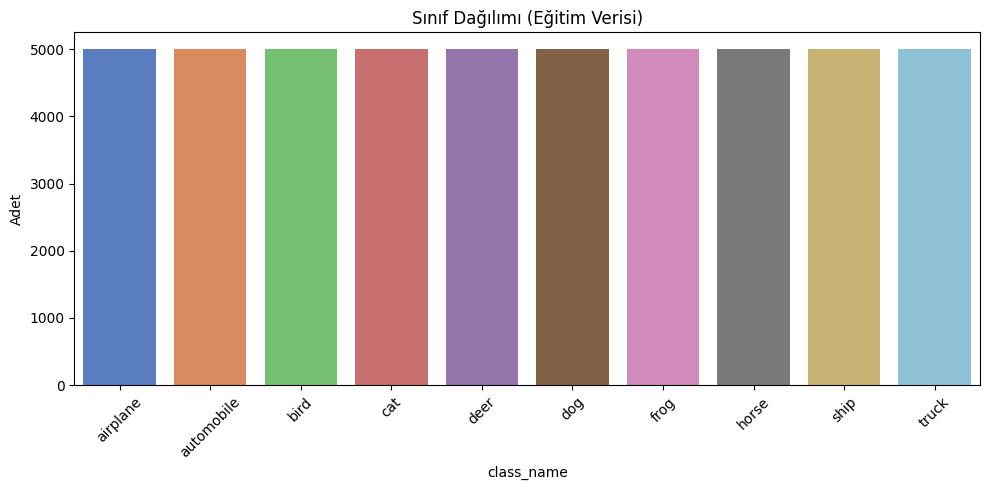

In [6]:
# Sınıf isimleri
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']
# Sınıf dağılımı
df = pd.DataFrame({'label': y_train})
df['class_name'] = df['label'].apply(lambda x: classes[x])
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="class_name", order=classes, palette="muted")
plt.title("Sınıf Dağılımı (Eğitim Verisi)")
plt.ylabel("Adet")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

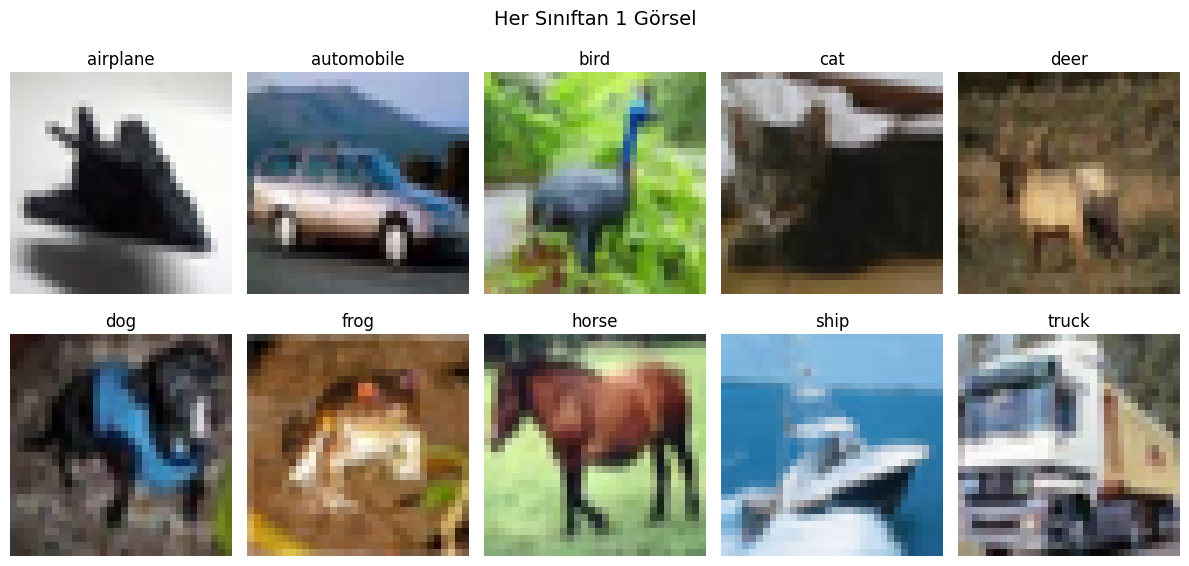

In [7]:
# Her sınıftan 1 örnek görsel
plt.figure(figsize=(12, 6))
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[idx])
    plt.title(classes[i])
    plt.axis('off')
plt.suptitle("Her Sınıftan 1 Görsel", fontsize=14)
plt.tight_layout()
plt.show()

In [8]:
# Normalizasyon (0-255 ➡️ 0-1)
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

RGB Ortalama Değerler: [0.49139968 0.48215841 0.44653091]
RGB Standart Sapmalar: [0.24703223 0.24348513 0.26158784]


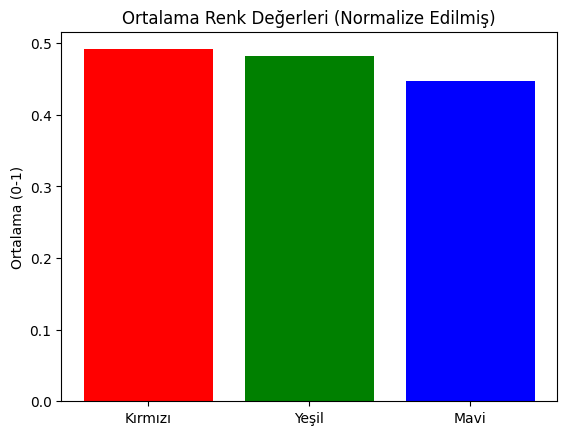

In [10]:
# Ortalama ve Standart Sapma (RGB)
means = X_train_norm.mean(axis=(0, 1, 2))
stds = X_train_norm.std(axis=(0, 1, 2))
print("RGB Ortalama Değerler:", means)
print("RGB Standart Sapmalar:", stds)
plt.bar(['Kırmızı', 'Yeşil', 'Mavi'], means, color=['red', 'green', 'blue'])
plt.title("Ortalama Renk Değerleri (Normalize Edilmiş)")
plt.ylabel("Ortalama (0-1)")
plt.show()

In [11]:

# Bozuk veri kontrolü
print("NaN içeriyor mu?", np.isnan(X_train).any())
print("Sıfırdan küçük değer var mı?", (X_train < 0).any())
image_shapes = [img.shape for img in X_train]
print("Tüm görsellerin boyutu aynı mı?:", len(set(image_shapes)) == 1)


NaN içeriyor mu? False
Sıfırdan küçük değer var mı? False
Tüm görsellerin boyutu aynı mı?: True


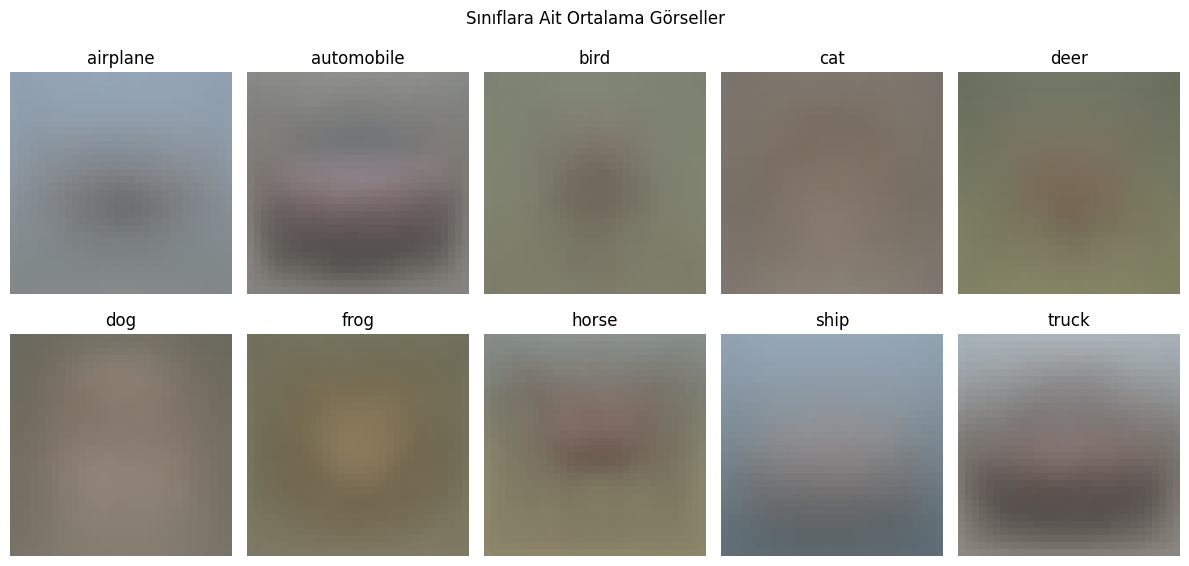

In [12]:
# Ortalama görseller (her sınıf için)
avg_images = []
for i in range(10):
    class_imgs = X_train_norm[y_train == i]
    avg_img = class_imgs.mean(axis=0)
    avg_images.append(avg_img)

plt.figure(figsize=(12, 6))
for i, avg_img in enumerate(avg_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(avg_img)
    plt.title(classes[i])
    plt.axis('off')
plt.suptitle("Sınıflara Ait Ortalama Görseller")
plt.tight_layout()
plt.show()


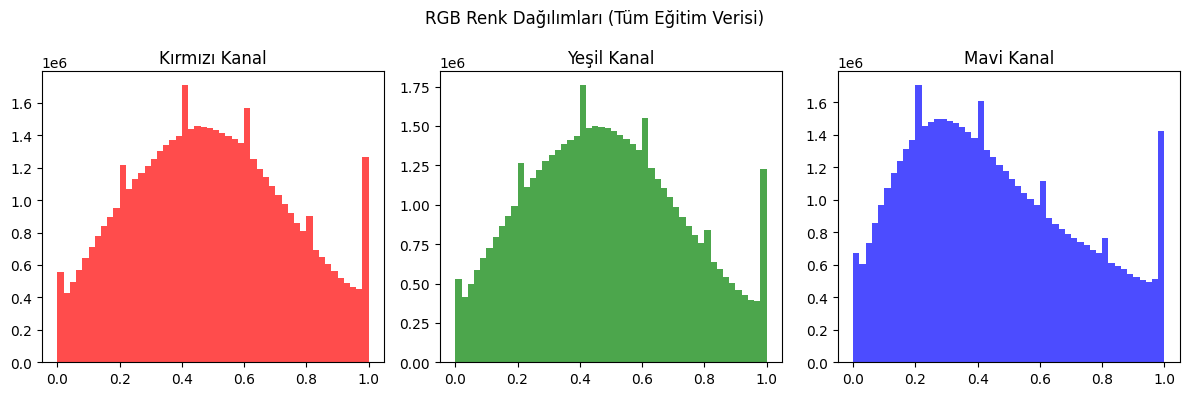

In [13]:
# RGB kanal dağılımları (tüm veri)
r = X_train_norm[:, :, :, 0].flatten()
g = X_train_norm[:, :, :, 1].flatten()
b = X_train_norm[:, :, :, 2].flatten()

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(r, bins=50, color='red', alpha=0.7)
plt.title("Kırmızı Kanal")

plt.subplot(1, 3, 2)
plt.hist(g, bins=50, color='green', alpha=0.7)
plt.title("Yeşil Kanal")

plt.subplot(1, 3, 3)
plt.hist(b, bins=50, color='blue', alpha=0.7)
plt.title("Mavi Kanal")

plt.suptitle("RGB Renk Dağılımları (Tüm Eğitim Verisi)")
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13900\243120148.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=color_variances, palette="coolwarm")


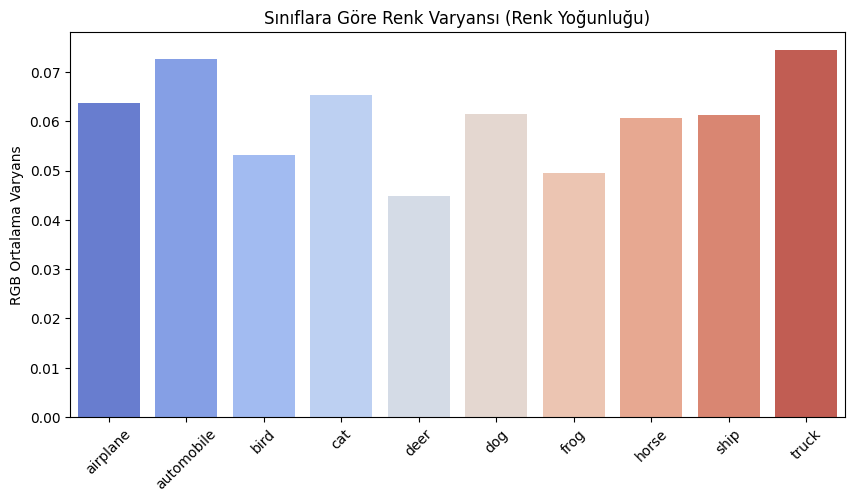

In [14]:
# Sınıflara göre RGB varyans analizi
color_variances = []
for i in range(10):
    imgs = X_train_norm[y_train == i]
    var_r = imgs[:, :, :, 0].var()
    var_g = imgs[:, :, :, 1].var()
    var_b = imgs[:, :, :, 2].var()
    avg_var = np.mean([var_r, var_g, var_b])
    color_variances.append(avg_var)

plt.figure(figsize=(10, 5))
sns.barplot(x=classes, y=color_variances, palette="coolwarm")
plt.title("Sınıflara Göre Renk Varyansı (Renk Yoğunluğu)")
plt.ylabel("RGB Ortalama Varyans")
plt.xticks(rotation=45)
plt.show()

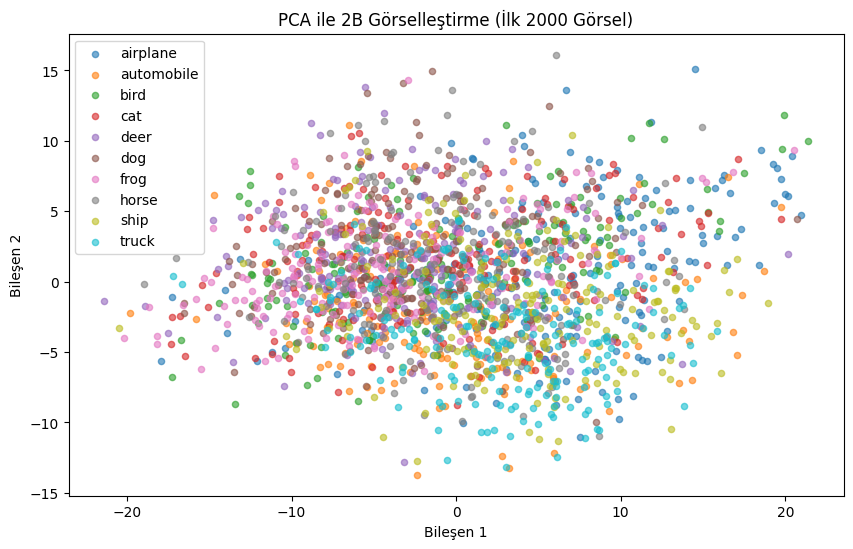

In [15]:
# PCA ile boyut indirgeme ve görselleştirme (ilk 2000 görsel)
subset_X = X_train_norm[:2000].reshape(2000, -1)
subset_y = y_train[:2000]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(subset_X)

plt.figure(figsize=(10, 6))
for i in range(10):
    idx = np.where(subset_y == i)
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=classes[i], alpha=0.6, s=20)
plt.legend()
plt.title("PCA ile 2B Görselleştirme (İlk 2000 Görsel)")
plt.xlabel("Bileşen 1")
plt.ylabel("Bileşen 2")
plt.show()